# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Data Set

In [2]:
iris_data = pd.read_csv('E:/data science/capstone Projects/Additional projects/IRIS.csv')

In [3]:
# print first 5 rows in dataframe
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# print last 5 rows in dataframe
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Number of rows and columns
iris_data.shape

(150, 5)

# 3. Exploratory Data Analysis

In [6]:
# Print the name of columns
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
# Rename the name of columns
iris_data.rename(columns = {'SepalLengthCm':'sepal_length', 'SepalWidthCm':'sepal_width', 'PetalLengthCm': 'petal_length','PetalWidthCm': 'petal_width'},inplace = True)

In [8]:
# getting some basic information about dataframe
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Checking the number of missing value
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# Getting the statistical measure of data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Count the value of each Species
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

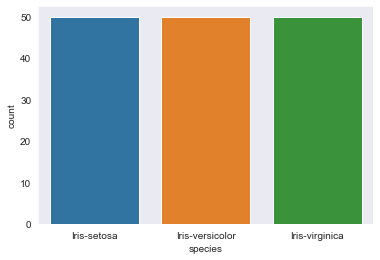

In [12]:
# draw countplot of Species
sns.set_style("dark")
sns.countplot('species', data= iris_data)
plt.show()

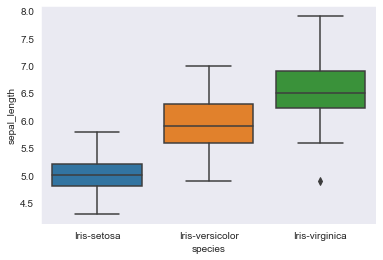

In [13]:
# Draw box plot of Species with sepal_length
sns.boxplot(x='species', y = 'sepal_length', data = iris_data)
plt.show()

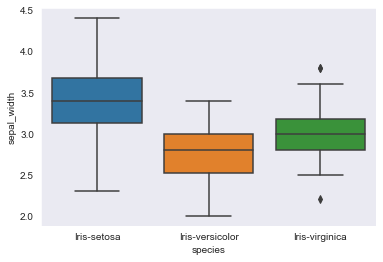

In [14]:
# Draw box plot of Species with sepal_width
sns.boxplot(x='species', y = 'sepal_width', data = iris_data)
plt.show()

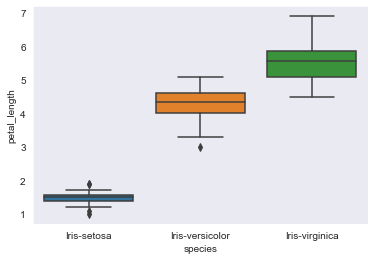

In [15]:
# Draw box plot of Species with petal_length
sns.boxplot(x='species', y = 'petal_length', data = iris_data)
plt.show()

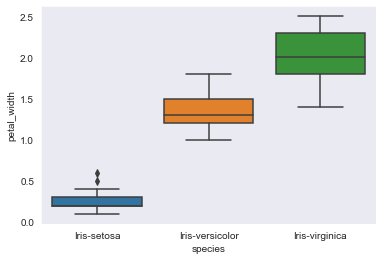

In [16]:
# Draw box plot of Species with petal_width
sns.boxplot(x='species', y = 'petal_width', data = iris_data)
plt.show()

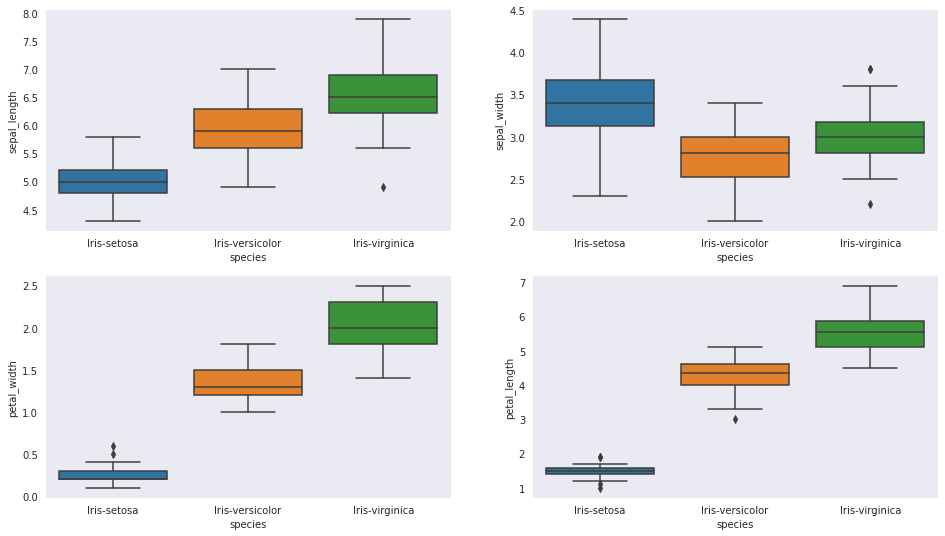

In [17]:
# Draw box plot of Species with all features
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(ax = axes[0,0],data=iris_data,x='species',y ='sepal_length')
sns.boxplot(ax = axes[0,1],data=iris_data,x='species', y ='sepal_width')
sns.boxplot(ax = axes[1,0],data=iris_data,x='species', y ='petal_width')
sns.boxplot(ax = axes[1,1],data=iris_data,x='species', y ='petal_length')
plt.show()

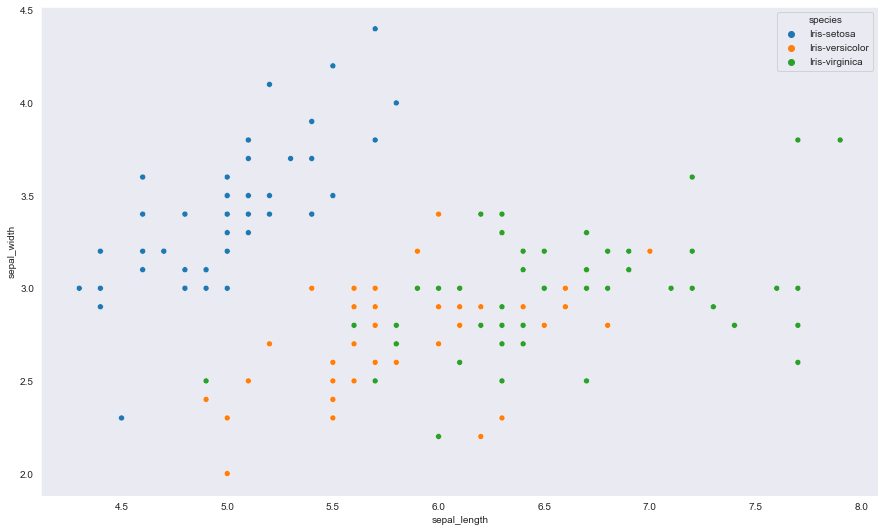

In [17]:
# Draw scatterplot sepal_length vs sepal_width
plt.figure(figsize=(15,9))
sns.scatterplot(x = "sepal_length",y ="sepal_width",hue='species',data = iris_data)
plt.show()

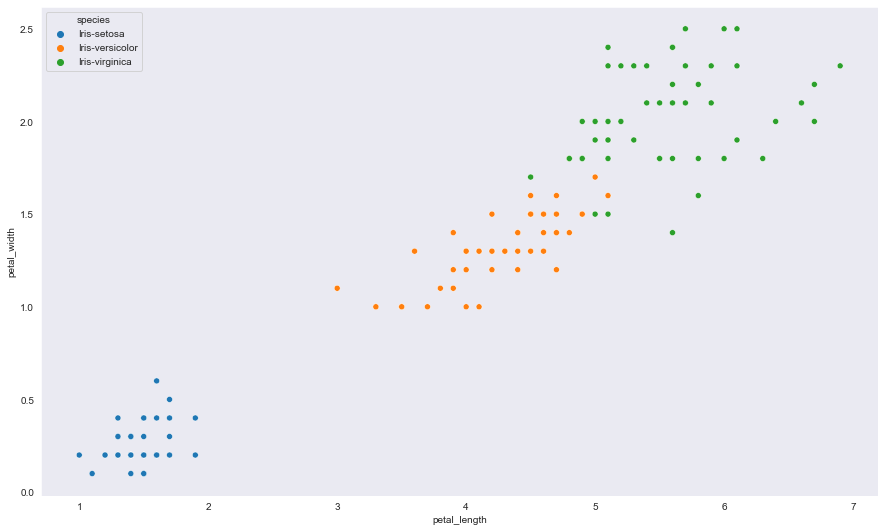

In [18]:
# Draw scatterplot petal_length vs petal_width
plt.figure(figsize=(15,9))
sns.scatterplot(x = "petal_length",y ="petal_width",hue='species',data = iris_data)
plt.show()

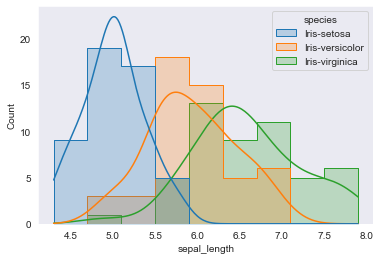

In [19]:
# Draw hist plot sepal_length
sns.histplot(x ='sepal_length',hue='species',kde=True, data= iris_data,element="step")
plt.show()

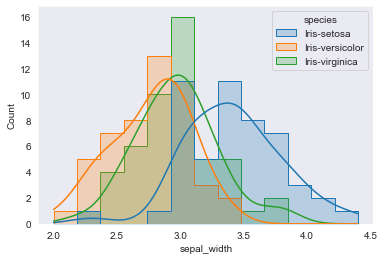

In [20]:
# Draw hist plot sepal_width
sns.histplot(x ='sepal_width',hue='species',kde=True, data= iris_data,element="step")
plt.show()

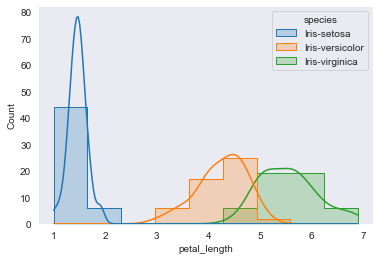

In [21]:
# Draw hist plot petal_length
sns.histplot(x ='petal_length',hue='species',kde=True, data= iris_data,element="step")
plt.show()

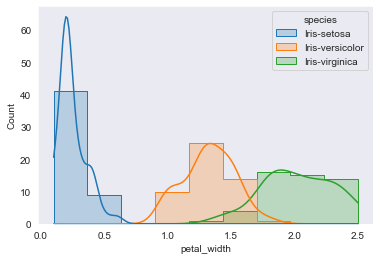

In [22]:
# Draw hist plot petal_width
sns.histplot(x ='petal_width',hue='species',kde=True, data= iris_data,element="step")
plt.show()

In [23]:
# Find correlation matrix
iris_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


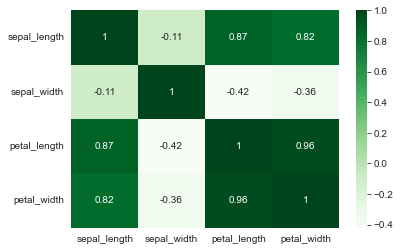

In [24]:
# Draw heatmap
sns.heatmap(iris_data.corr(),annot=True,cmap='Greens')
plt.show()

# 4. Data Preprocessing

In [25]:
# Division of data into dependent variables and independent varibale
X = iris_data.drop('species', axis = 1)
y = iris_data['species']

In [27]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
## print(y)

In [28]:
# Spliting into Train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=101)


print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of X_train is: (120, 4)
The shape of X_test is: (30, 4)
The shape of y_train is: (120,)
The shape of y_test is: (30,)


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Print Standardized X_train data
##print(X_train)

In [31]:
# Print Standardized X_test data
print(X_test)

# 5.Model Building

## 5.1 Logistic Regression

In [32]:
# Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
# Model prediction on train data
pred_train = model.predict(X_train)

In [34]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.95        38
           2       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
Accuracy Score of Model on train data is: 0.9666666666666667


In [35]:
# Model prediction on test data
pred_test = model.predict(X_test)

In [36]:
# Model Evaluation on test data

# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667


## 5.2 K-Nearest Neighbors

In [37]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [38]:
# Model prediction on train data
pred_train = model.predict(X_train)

In [39]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.88      1.00      0.94        38
           2       1.00      0.88      0.94        42

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

[[40  0  0]
 [ 0 38  0]
 [ 0  5 37]]
Accuracy Score of Model on train data is: 0.9583333333333334


In [40]:
# Model prediction on test data
pred_test = model.predict(X_test)

In [41]:
# Model Evaluation on test data

# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
Accuracy Score of Model on test data is: 1.0


## 5.3 Gaussian Naive Bayes

In [42]:
# Model Training
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [43]:
# Model prediction on train data
pred_train = model.predict(X_train)

In [44]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      0.95      0.94        38
           2       0.95      0.93      0.94        42

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

[[40  0  0]
 [ 0 36  2]
 [ 0  3 39]]
Accuracy Score of Model on train data is: 0.9583333333333334


In [45]:
# Model prediction on test data
pred_test = model.predict(X_test)

In [46]:
# Model Evaluation on test data

# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667


# 5.4 Support Vector Machine

In [47]:
# Model Training
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [48]:
# Model prediction on train data
pred_train = model.predict(X_train)

In [49]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        38
           2       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
Accuracy Score of Model on train data is: 0.9833333333333333


In [50]:
# Model prediction on test data
pred_test = model.predict(X_test)

In [51]:
# Model Evaluation on test data

# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         8

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  1  0]
 [ 0 12  0]
 [ 0  0  8]]
Accuracy Score of Model on test data is: 0.9666666666666667



# 5.5Decision Tree

In [52]:
# Model Training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
# Model prediction on train data
pred_train = model.predict(X_train)

In [54]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]
Accuracy Score of Model on train data is: 1.0


In [55]:
# Model prediction on test data
pred_test = model.predict(X_test)

In [56]:
# Model Evaluation on test data

# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667


# 5.6 Random Forest

In [57]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
# Model prediction on train data
pred_train = model.predict(X_train)

In [59]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]
Accuracy Score of Model on train data is: 1.0


In [62]:
# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
